In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve
import seaborn as sns

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
seed = 42
np.random.seed(seed)

In [3]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=seed)

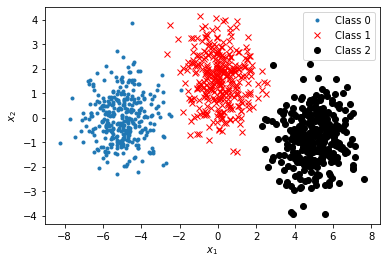

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.plot(x[idx2,0], x[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('classes.png', dpi=600)
plt.show()

In [5]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

x_train = np.c_[np.ones((len(y_train), 1)), x_train]

x_test = np.c_[np.ones((len(y_test), 1)), x_test]

In [6]:
# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial', random_state=seed)

In [7]:
# Train model.
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [8]:
# Predict.
y_pred = model.predict(x_test)

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


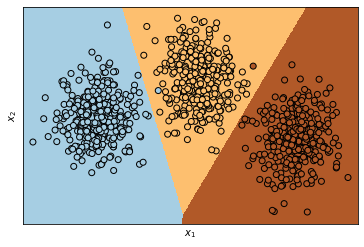

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.savefig('decision_boundaries.png', dpi=600)
plt.show()

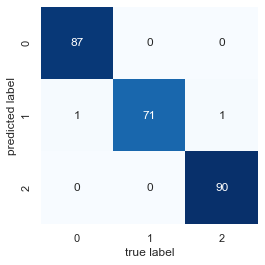

In [10]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

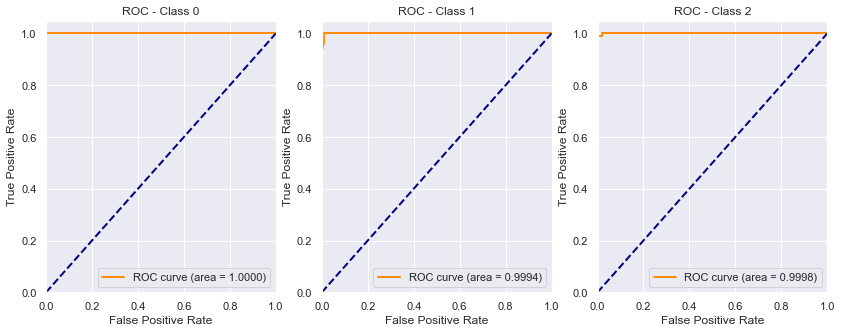

In [21]:
# Getting the probabilities for each class.
y_prob = model.predict_proba(x_test)

# Binarize the test targets.
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(14, 5))
lw = 2
for i in range(3):
    # Calculating ROC curve and ROC AUC.
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plotting ROC curve for class i.
    ax = plt.subplot(1, 3, i + 1)
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=lw, label='ROC curve (area = %1.4f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class '+str(i))
    plt.legend(loc="lower right")

plt.savefig('roc.png', dpi=600)
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.97      1.00      0.99        71
           2       1.00      0.99      0.99        91

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [13]:
print('Accuracy of Logistic Regression model is:', accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 99.2


In [14]:
print('Precision score is:', precision_score(y_test, y_pred, average=None))

Precision score is: [1.         0.97260274 1.        ]


In [15]:
print('Recall is:', recall_score(y_test, y_pred, average=None))

Recall is: [0.98863636 1.         0.98901099]


In [16]:
print('F1-score is:', f1_score(y_test, y_pred, average=None))

F1-score is: [0.99428571 0.98611111 0.99447514]


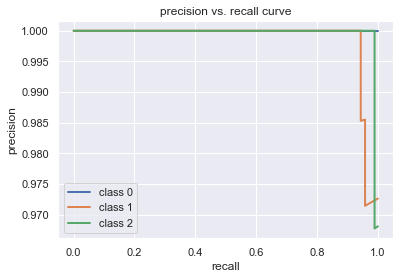

In [17]:
# Plot precision recall curve.
precision = dict()
recall = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.savefig('precision_recall_curve.png', dpi=600)
plt.show()

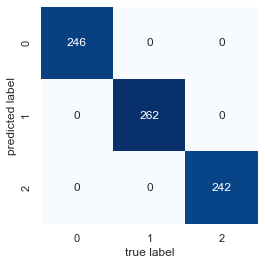

In [18]:
y_pred = model.predict(x_train)

# Plot the confusion matrix
mat = confusion_matrix(y_train, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       262
           2       1.00      1.00      1.00       242

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

